In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = '/kaggle/input/soccer/database.sqlite'

In [3]:
db = sqlite3.connect(data)

Tables present in the database

In [4]:
tables = pd.read_sql("select * from sqlite_master where type = 'table';",db)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


List of Countries

In [5]:
country = pd.read_sql("select * from Country;",db)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Leagues and their Country

In [6]:
league = pd.read_sql("select * from League;",db)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [7]:
league_2 = pd.read_sql("""select * from League 
                            join Country on Country.id = League.country_id;""",db)
league_2

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


Teams

In [8]:
team = pd.read_sql("select * from Team;",db)
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [9]:
teams = pd.read_sql("select * from Team order by team_long_name limit 10;",db)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


Matches

In [10]:
match = pd.read_sql("select * from Match;",db)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
match_2 = pd.read_sql("""select Match.id,Country.name as country_name,
                            League.name as league_name,season,stage,date,
                            HT.team_long_name as home_team,
                            AT.team_long_name as away_team,
                            home_team_goal,
                            away_team_goal 
                            from Match 
                            join Country on Country.id = Match.country_id 
                            join League on League.id = Match.league_id 
                            left join Team as HT on HT.team_api_id = Match.home_team_api_id 
                            left join Team as AT on AT.team_api_id = Match.away_team_api_id 
                            where country_name = 'France' 
                            order by date 
                            limit 10;""",db)
match_2

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,4769,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AJ Auxerre,FC Nantes,2,1
1,4770,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Girondins de Bordeaux,SM Caen,2,1
2,4771,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Havre AC,OGC Nice,1,0
3,4772,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Mans FC,FC Lorient,0,1
4,4774,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AS Monaco,Paris Saint-Germain,1,0
5,4775,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AS Nancy-Lorraine,LOSC Lille,0,0
6,4776,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Stade Rennais FC,Olympique de Marseille,4,4
7,4777,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,FC Sochaux-Montbéliard,Grenoble Foot 38,1,2
8,4778,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Valenciennes FC,AS Saint-Étienne,1,0
9,4773,France,France Ligue 1,2008/2009,1,2008-08-10 00:00:00,Olympique Lyonnais,Toulouse FC,3,0


Leagues by season

In [12]:
league_by_season = pd.read_sql("""select Country.name as country_name,
                                    League.name as league_name,
                                    season,
                                    count(distinct stage) as no_of_stages,
                                    count(distinct HT.team_long_name) as no_of_teams,
                                    avg(home_team_goal) as avg_home_team_score,
                                    avg(away_team_goal) as avg_away_team_score,
                                    avg(home_team_goal-away_team_goal) as avg_goal_diff,
                                    avg(home_team_goal+away_team_goal) as avg_goals,
                                    sum(home_team_goal+away_team_goal) as total_goals
                                    from Match
                                    join Country on Country.id = Match.country_id
                                    join League on League.id = Match.league_id
                                    left join Team as HT on HT.team_api_id = Match.home_team_api_id
                                    left join Team as AT on AT.team_api_id = Match.away_team_api_id
                                    where country_name in ('England','Germany','France','Spain')
                                    group by Country.name, League.name, season
                                    having count(distinct stage) > 10
                                    order by Country.name, League.name, season desc;""",db)
league_by_season

,country_name,league_name,season,no_of_stages,no_of_teams,avg_home_team_score,avg_away_team_score,avg_goal_diff,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


<Axes: title={'center': 'Average goals per game over time'}>

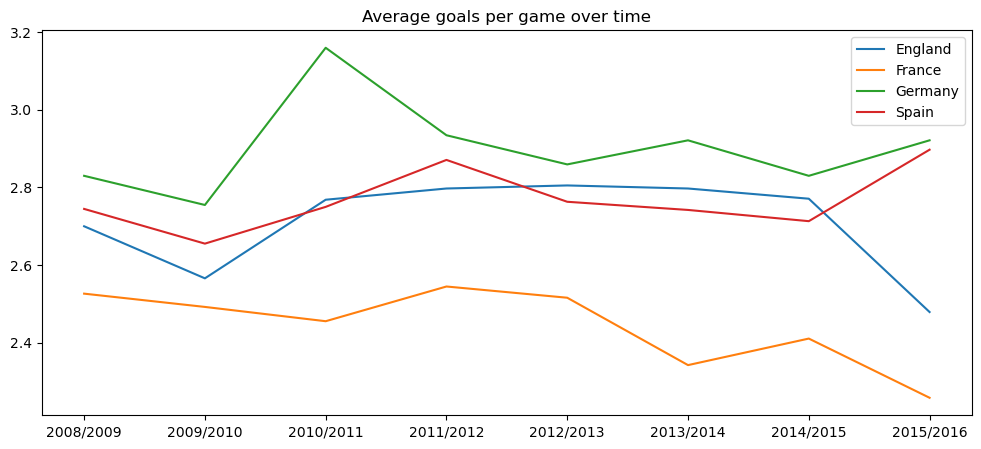

In [13]:
df = pd.DataFrame(index = np.sort(league_by_season['season'].unique()),columns = 
                                 league_by_season['country_name'].unique())

df.loc[:,'England'] = list(league_by_season.loc[league_by_season['country_name'] == 'England',
                                            'avg_goals'])
df.loc[:,'France'] = list(league_by_season.loc[league_by_season['country_name'] == 'France',
                                             'avg_goals'])
df.loc[:,'Germany'] = list(league_by_season.loc[league_by_season['country_name'] == 'Germany',
                                             'avg_goals'])
df.loc[:,'Spain'] = list(league_by_season.loc[league_by_season['country_name'] == 'Spain',
                                             'avg_goals'])

df.plot(figsize = (12,5), title = 'Average goals per game over time')

<Axes: title={'center': 'Average goals per game over time'}>

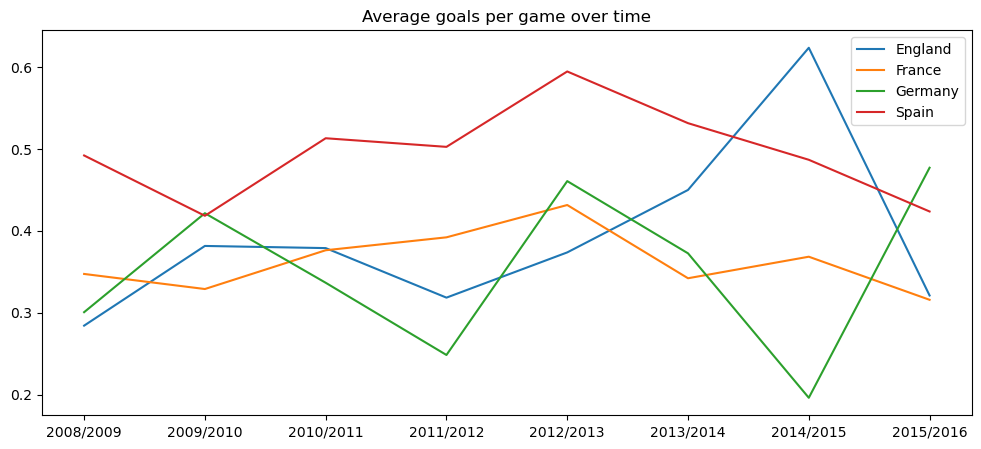

In [14]:
df = pd.DataFrame(index = np.sort(league_by_season['season'].unique()),columns = 
                                 league_by_season['country_name'].unique())

df.loc[:,'England'] = list(league_by_season.loc[league_by_season['country_name'] == 'England',
                                            'avg_goal_diff'])
df.loc[:,'France'] = list(league_by_season.loc[league_by_season['country_name'] == 'France',
                                             'avg_goal_diff'])
df.loc[:,'Germany'] = list(league_by_season.loc[league_by_season['country_name'] == 'Germany',
                                             'avg_goal_diff'])
df.loc[:,'Spain'] = list(league_by_season.loc[league_by_season['country_name'] == 'Spain',
                                             'avg_goal_diff'])

df.plot(figsize = (12,5), title = 'Average goals per game over time')

Player Attributes

In [15]:
player = pd.read_sql("select * from Player_attributes",db)
player.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [16]:
player_2 = pd.read_sql("select * from Player",db)
player_2.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [17]:
player_attrib = pd.read_sql("""select case
                                when round(height)<165 then 165
                                when round(height)>195 then 195
                                else round(height)
                                end as cal_height,
                                count(height) as distribution,
                                (avg(PA_group_2.avg_overall_rating)) as avg_overall_rating,
                                (avg(PA_group_2.avg_potential)) as avg_potential,
                                avg(weight) as avg_weight
                                from Player 
                                left join
                                (select Player_attributes.player_api_id,
                                avg(Player_attributes.overall_rating) as avg_overall_rating,
                                avg(Player_attributes.potential) as avg_potential
                                from Player_attributes 
                                group by Player_attributes.player_api_id)
                                as PA_group_2 on Player.player_api_id = PA_group_2.player_api_id
                                group by cal_height
                                order by cal_height;""",db)
player_attrib

,cal_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


Potential vs Height

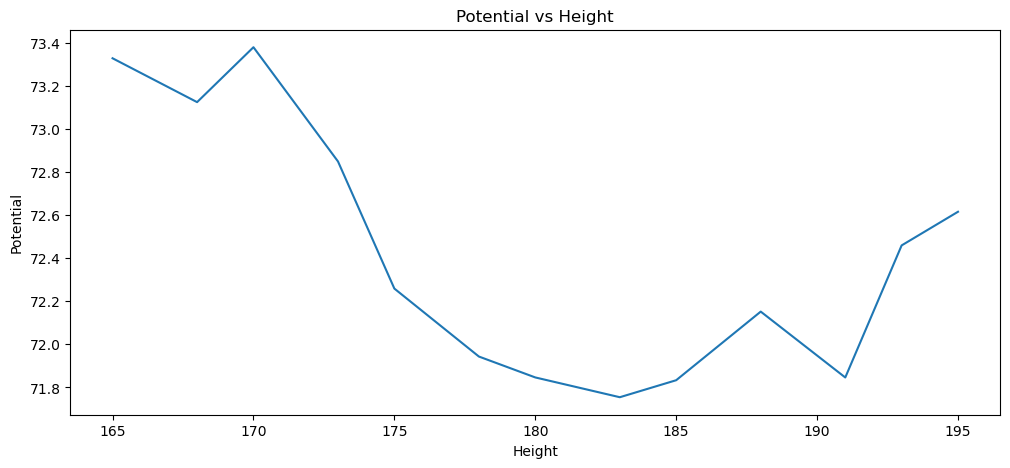

In [18]:
plt.figure(figsize = (12,5))
plt.plot(player_attrib['cal_height'],player_attrib['avg_potential'])
plt.xlabel('Height')
plt.ylabel('Potential')
plt.title('Potential vs Height')
plt.show()